#Question 1:

Perform a regression task for wine quality data

You don't need to perform step 1,2 for EDA and preprocessing. Please proceed to modeling step

*   Perform multiple linear regression to predict alcohol level

*   Get the accurracy metrics: MAE, MSE, RMSE, R-square score and give your comments
*   Perfrom residual analysis and give your comments


*   From your residual analysis, is there anything that violate the linear relationship assumption? and why?



In [18]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Homework/Data/wine_quality.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv(path)

# Encode the 'quality_category' column using Label Encoding
encoder = LabelEncoder()
data['quality_category'] = encoder.fit_transform(data['quality_category'])

# Define input features and target variable
X = data.drop(columns=['alcohol'])  # Features
y = data['alcohol']  # Target variable

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print accuracy metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


MAE: 0.45648490806094083
MSE: 0.3551222283456688
RMSE: 0.595921327312313
R-squared: 0.6950924660519527


Comments on Accuracy Metrics:
* MAE: Measures the average absolute error in predictions. A lower value indicates better performance.
* MSE: Penalizes larger errors more heavily due to squaring. A lower value is better.
* RMSE: Provides an error measure in the same units as alcohol levels. Lower values indicate better performance.
* R-squared (R²): Indicates how well the independent variables explain variance in alcohol levels. A value closer to 1 suggests a good fit.

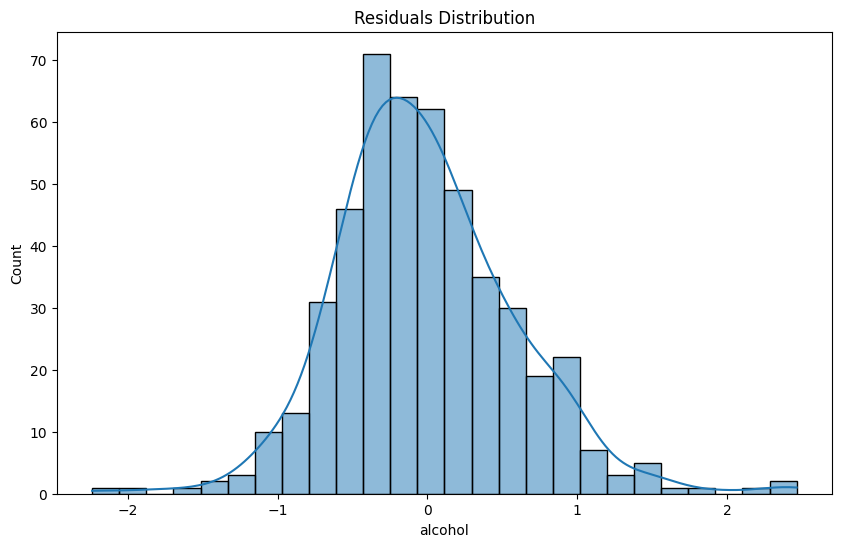

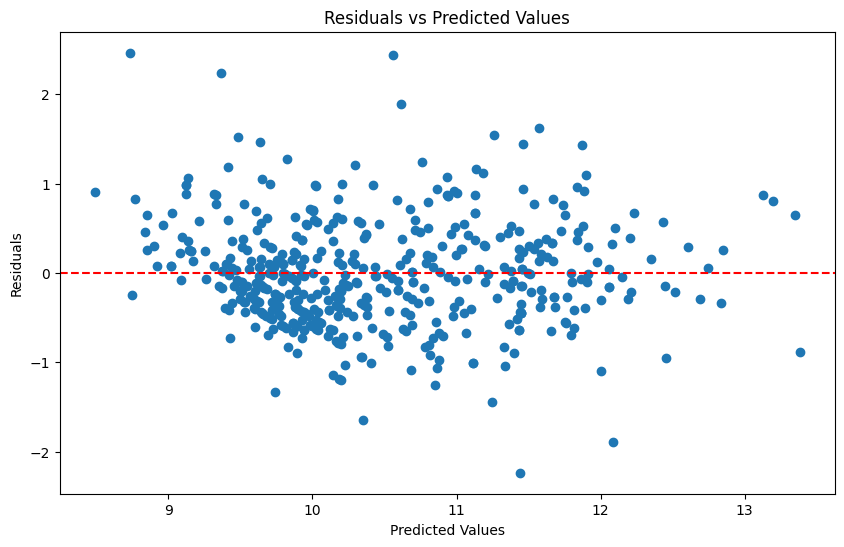

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Comments on Residual Analysis:
* The histogram of residuals should ideally follow a normal distribution centered around zero. If residuals are skewed or have outliers, it may indicate issues with model fit or violations of assumptions.
* The scatter plot of residuals vs predicted values should show no clear pattern. If there is a pattern (e.g., funnel shape), it suggests heteroscedasticity or non-linearity.

Observations:
* Linearity:
If a clear pattern (e.g., a curve) is observed in the residuals vs predicted values plot, it suggests that the relationship between predictors and alcohol level is not purely linear.
This would violate the linearity assumption.
* Homoscedasticity:
If residuals show increasing or decreasing spread (heteroscedasticity), this violates another assumption of linear regression — that variance of residuals should be constant across all levels of predicted values.
* Normality of Residuals:
If residuals do not follow a normal distribution (as seen in their histogram), this could indicate that some predictors have non-linear relationships with alcohol level or that there are outliers affecting performance.